### DATA 601 - Project 1 - Crime Data from 2020 to Present in the City of Los Angeles

Dataset Name:  Crime Data from 2020 to Present in the City of Los Angeles

Description: https://data.lacity.org/A-Safe-City/Crime-Data-from-2020-to-Present/2nrs-mtv8

CSV link:   https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD

Rows: 33,362 + 1 header (Note: The number of rows keeps changing as new crime data is added to the dataset)

Columns: 28

Size: 8,347 KB (Note: The size of the dataset keeps changing as new crime data is added to the dataset)

It has more than 2 data types.

I found this dataset on  https://www.data.gov website and it is compliant with the source. I had searched for the key words "csv data" in Google and this was the first website that came up. In the website, I had sorted the datasets to show newest first. The dataset for  Crime Data from 2020 to Present in the City of Los Angeles was available on the first page.

The dataset has data about the date, time, location, type of crime, victim details, and etc. This data can be used to analyze the time, place, and type of crimes that have happened in the City of Los Angeles from 2020 to present. I could come up with a model that shows the same in a visualized manner.

Intializing libraries

#reference: loans_visualization_big_data_for_students.ipynb

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print('Pandas',pd.__version__)

Pandas 1.0.1


Reading CSV

In [2]:
start_time = time.time()
df = pd.read_csv("https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD")
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

Dataframe Shape (Note: The number of rows keeps changing as the dataset is being updated regularly with new crime data)

In [3]:
df.shape

(147947, 28)

Names of columns

In [4]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

Full summary of the dataframe

On the first look at the individual totals of the columns, we caould see that the total rows are 29240 and few columns are havinf less data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147947 entries, 0 to 147946
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           147947 non-null  int64  
 1   Date Rptd       147947 non-null  object 
 2   DATE OCC        147947 non-null  object 
 3   TIME OCC        147947 non-null  int64  
 4   AREA            147947 non-null  int64  
 5   AREA NAME       147947 non-null  object 
 6   Rpt Dist No     147947 non-null  int64  
 7   Part 1-2        147947 non-null  int64  
 8   Crm Cd          147947 non-null  int64  
 9   Crm Cd Desc     147947 non-null  object 
 10  Mocodes         128343 non-null  object 
 11  Vict Age        147947 non-null  int64  
 12  Vict Sex        129173 non-null  object 
 13  Vict Descent    129171 non-null  object 
 14  Premis Cd       147946 non-null  float64
 15  Premis Desc     147891 non-null  object 
 16  Weapon Used Cd  55184 non-null   float64
 17  Weapon Des

First 10 rows

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
DR_NO,10304468,190101086,200914052,191501505,191921269,200100501,200100502,200100504,200100507,201710725
Date Rptd,01/08/2020 12:00:00 AM,01/02/2020 12:00:00 AM,08/27/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,07/03/2020 12:00:00 AM
DATE OCC,01/08/2020 12:00:00 AM,01/01/2020 12:00:00 AM,08/27/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/02/2020 12:00:00 AM,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,07/02/2020 12:00:00 AM
TIME OCC,2230,330,1255,1730,415,30,1315,40,200,500
AREA,3,1,9,15,19,1,1,1,1,17
AREA NAME,Southwest,Central,Van Nuys,N Hollywood,Mission,Central,Central,Central,Central,Devonshire
Rpt Dist No,377,163,935,1543,1998,163,161,155,101,1762
Part 1-2,2,2,2,2,2,1,1,2,1,1
Crm Cd,624,624,624,745,740,121,442,946,341,310
Crm Cd Desc,BATTERY - SIMPLE ASSAULT,BATTERY - SIMPLE ASSAULT,BATTERY - SIMPLE ASSAULT,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","RAPE, FORCIBLE",SHOPLIFTING - PETTY THEFT ($950 & UNDER),OTHER MISCELLANEOUS CRIME,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",BURGLARY


Last 10 rows

In [7]:
df.tail(10).T

,147937,147938,147939,147940,147941,147942,147943,147944,147945,147946
DR_NO,201514522,200115971,200118510,201818080,202114293,201818058,200814339,201418192,200318352,200118692
Date Rptd,08/28/2020 12:00:00 AM,08/06/2020 12:00:00 AM,09/25/2020 12:00:00 AM,10/01/2020 12:00:00 AM,09/29/2020 12:00:00 AM,09/30/2020 12:00:00 AM,09/21/2020 12:00:00 AM,10/01/2020 12:00:00 AM,10/05/2020 12:00:00 AM,09/30/2020 12:00:00 AM
DATE OCC,08/28/2020 12:00:00 AM,08/06/2020 12:00:00 AM,09/25/2020 12:00:00 AM,10/01/2020 12:00:00 AM,09/29/2020 12:00:00 AM,09/30/2020 12:00:00 AM,09/17/2020 12:00:00 AM,08/15/2020 12:00:00 AM,10/05/2020 12:00:00 AM,09/30/2020 12:00:00 AM
TIME OCC,1415,2205,2310,1430,230,2245,830,1200,900,410
AREA,15,1,1,18,21,18,8,14,3,1
AREA NAME,N Hollywood,Central,Central,Southeast,Topanga,Southeast,West LA,Pacific,Southwest,Central
Rpt Dist No,1522,139,128,1802,2175,1823,824,1464,326,185
Part 1-2,1,2,2,1,1,1,1,1,1,1
Crm Cd,230,888,624,761,440,230,341,310,510,210
Crm Cd Desc,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",TRESPASSING,BATTERY - SIMPLE ASSAULT,BRANDISH WEAPON,THEFT PLAIN - PETTY ($950 & UNDER),"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",BURGLARY,VEHICLE - STOLEN,ROBBERY


Summary of statistics

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DR_NO,147947,NaN,NaN,NaN,2.0109e+08,943841,817,2.00605e+08,2.01111e+08,2.01608e+08,2.09915e+08
Date Rptd,147947,279,07/13/2020 12:00:00 AM,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE OCC,147947,279,05/30/2020 12:00:00 AM,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME OCC,147947,NaN,NaN,NaN,1357.33,649.415,1,923,1440,1900,2359
AREA,147947,NaN,NaN,NaN,10.8301,6.05372,1,6,11,16,21
AREA NAME,147947,21,77th Street,9744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rpt Dist No,147947,NaN,NaN,NaN,1128.97,605.449,101,628,1152,1637,2198
Part 1-2,147947,NaN,NaN,NaN,1.41575,0.492853,1,1,1,2,2
Crm Cd,147947,NaN,NaN,NaN,512.831,210.25,110,330,510,627,956
Crm Cd Desc,147947,128,VEHICLE - STOLEN,15388,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

Removing duplicate crimes

In [9]:
#reference: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
df = df.drop_duplicates(subset='DR_NO', keep='last')
df.shape

(147947, 28)

Converting date columns into date format

In [10]:
#reference: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
df['Date Rptd_as_date'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC_as_date'] = pd.to_datetime(df['DATE OCC'])

Converting time column into time format

In [11]:
#reference: https://datatofish.com/integer-to-float-dataframe/
df['TIME OCC_HH'] = (df['TIME OCC']/100).astype(int)
df['TIME OCC_MM'] = (df['TIME OCC'] - (df['TIME OCC_HH']*100)).astype(int)

In [12]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
DR_NO,10304468,190101086,200914052,191501505,191921269,200100501,200100502,200100504,200100507,201710725
Date Rptd,01/08/2020 12:00:00 AM,01/02/2020 12:00:00 AM,08/27/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,07/03/2020 12:00:00 AM
DATE OCC,01/08/2020 12:00:00 AM,01/01/2020 12:00:00 AM,08/27/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,01/02/2020 12:00:00 AM,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,07/02/2020 12:00:00 AM
TIME OCC,2230,330,1255,1730,415,30,1315,40,200,500
AREA,3,1,9,15,19,1,1,1,1,17
AREA NAME,Southwest,Central,Van Nuys,N Hollywood,Mission,Central,Central,Central,Central,Devonshire
Rpt Dist No,377,163,935,1543,1998,163,161,155,101,1762
Part 1-2,2,2,2,2,2,1,1,2,1,1
Crm Cd,624,624,624,745,740,121,442,946,341,310
Crm Cd Desc,BATTERY - SIMPLE ASSAULT,BATTERY - SIMPLE ASSAULT,BATTERY - SIMPLE ASSAULT,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","RAPE, FORCIBLE",SHOPLIFTING - PETTY THEFT ($950 & UNDER),OTHER MISCELLANEOUS CRIME,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",BURGLARY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147947 entries, 0 to 147946
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              147947 non-null  int64         
 1   Date Rptd          147947 non-null  object        
 2   DATE OCC           147947 non-null  object        
 3   TIME OCC           147947 non-null  int64         
 4   AREA               147947 non-null  int64         
 5   AREA NAME          147947 non-null  object        
 6   Rpt Dist No        147947 non-null  int64         
 7   Part 1-2           147947 non-null  int64         
 8   Crm Cd             147947 non-null  int64         
 9   Crm Cd Desc        147947 non-null  object        
 10  Mocodes            128343 non-null  object        
 11  Vict Age           147947 non-null  int64         
 12  Vict Sex           129173 non-null  object        
 13  Vict Descent       129171 non-null  object  

## Removing unwanted data

Drop columns "Mocodes", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4" and "Cross Street"

These columns are being dropped as column:

"Mocodes" - has codes that are not interpretable

"Crm Cd 2", "Crm Cd 3", "Crm Cd 4" and "Cross Street" - have more than 80% empty rows

In [14]:
df_new = df.drop(['Mocodes', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147947 entries, 0 to 147946
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              147947 non-null  int64         
 1   Date Rptd          147947 non-null  object        
 2   DATE OCC           147947 non-null  object        
 3   TIME OCC           147947 non-null  int64         
 4   AREA               147947 non-null  int64         
 5   AREA NAME          147947 non-null  object        
 6   Rpt Dist No        147947 non-null  int64         
 7   Part 1-2           147947 non-null  int64         
 8   Crm Cd             147947 non-null  int64         
 9   Crm Cd Desc        147947 non-null  object        
 10  Vict Age           147947 non-null  int64         
 11  Vict Sex           129173 non-null  object        
 12  Vict Descent       129171 non-null  object        
 13  Premis Cd          147946 non-null  float64 

Finding unique values and their counts in "Vict Sex" column.

Removing rows with invalid values and updating nan with 'X' - unknown.

In [16]:
#reference: https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
df_new['Vict Sex'].unique()

array(['F', 'M', 'X', nan, 'H'], dtype=object)

In [17]:
#reference: https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
df_new['Vict Sex'].value_counts()

M    63250
F    53413
X    12497
H       13
Name: Vict Sex, dtype: int64

In [18]:
#reference: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
df_new = df_new[df_new['Vict Sex'] != 'H']

In [19]:
df_new['Vict Sex'].value_counts()

M    63250
F    53413
X    12497
Name: Vict Sex, dtype: int64

In [20]:
#reference: https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafram
df_new['Vict Sex'].fillna('X', inplace=True)

In [21]:
df_new['Vict Sex'].value_counts()

M    63250
F    53413
X    31271
Name: Vict Sex, dtype: int64

The total values in "Vict Sex" column is updated.

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147934 entries, 0 to 147946
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              147934 non-null  int64         
 1   Date Rptd          147934 non-null  object        
 2   DATE OCC           147934 non-null  object        
 3   TIME OCC           147934 non-null  int64         
 4   AREA               147934 non-null  int64         
 5   AREA NAME          147934 non-null  object        
 6   Rpt Dist No        147934 non-null  int64         
 7   Part 1-2           147934 non-null  int64         
 8   Crm Cd             147934 non-null  int64         
 9   Crm Cd Desc        147934 non-null  object        
 10  Vict Age           147934 non-null  int64         
 11  Vict Sex           147934 non-null  object        
 12  Vict Descent       129158 non-null  object        
 13  Premis Cd          147933 non-null  float64 

Finding unique values and their counts in "Vict Descent" column.

Updating nan with 'X' - unknown.

In [23]:
df_new['Vict Descent'].unique()

array(['B', 'H', 'W', 'X', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'P',
       'J', 'U', 'S', 'G', 'Z', 'D', 'L'], dtype=object)

In [24]:
#df_new['Vict Descent'].value_counts()

In [25]:
df_new['Vict Descent'].fillna('X', inplace=True)

The total values in "Vict Descent" column is updated.

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147934 entries, 0 to 147946
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              147934 non-null  int64         
 1   Date Rptd          147934 non-null  object        
 2   DATE OCC           147934 non-null  object        
 3   TIME OCC           147934 non-null  int64         
 4   AREA               147934 non-null  int64         
 5   AREA NAME          147934 non-null  object        
 6   Rpt Dist No        147934 non-null  int64         
 7   Part 1-2           147934 non-null  int64         
 8   Crm Cd             147934 non-null  int64         
 9   Crm Cd Desc        147934 non-null  object        
 10  Vict Age           147934 non-null  int64         
 11  Vict Sex           147934 non-null  object        
 12  Vict Descent       147934 non-null  object        
 13  Premis Cd          147933 non-null  float64 

Finding unique values and their counts in "Weapon Used Cd" column.

Updating nan with '0' - No Weapon.

In [27]:
df_new['Weapon Used Cd'].unique()

array([400., 500.,  nan, 306., 511., 204., 208., 302., 212., 218., 102.,
       515., 307., 216., 308., 101., 200., 215., 107., 207., 506., 512.,
       221., 113., 201., 504., 501., 312., 214., 106., 311., 305., 219.,
       301., 114., 223., 109., 104., 205., 513., 303., 206., 304., 211.,
       103., 115., 116., 110., 122., 310., 309., 112., 502., 217., 111.,
       210., 508., 510., 203., 507., 514., 509., 505., 213., 105., 503.,
       108., 220., 516., 118., 300., 202., 123., 119., 120., 209.])

In [28]:
#df_new['Weapon Used Cd'].value_counts()

In [29]:
df_new['Weapon Used Cd'].fillna(0, inplace=True)

In [30]:
df_new['Weapon Used Cd'].unique()

array([400., 500.,   0., 306., 511., 204., 208., 302., 212., 218., 102.,
       515., 307., 216., 308., 101., 200., 215., 107., 207., 506., 512.,
       221., 113., 201., 504., 501., 312., 214., 106., 311., 305., 219.,
       301., 114., 223., 109., 104., 205., 513., 303., 206., 304., 211.,
       103., 115., 116., 110., 122., 310., 309., 112., 502., 217., 111.,
       210., 508., 510., 203., 507., 514., 509., 505., 213., 105., 503.,
       108., 220., 516., 118., 300., 202., 123., 119., 120., 209.])

Finding unique values and their counts in "Weapon Desc" column.

Updating nan with 'NONE' - No Weapon.

In [31]:
df_new['Weapon Desc'].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', nan, 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'RAZOR', 'BLUNT INSTRUMENT',
       'BOTTLE', 'OTHER CUTTING INSTRUMENT', 'HAND GUN',
       'PHYSICAL PRESENCE', 'VEHICLE', 'SCISSORS', 'STICK', 'REVOLVER',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'MACHETE', 'OTHER FIREARM',
       'OTHER KNIFE', 'FIRE', 'MACE/PEPPER SPRAY', 'GLASS',
       'SIMULATED GUN', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'DEMAND NOTE', 'BOMB THREAT', 'PIPE/METAL PIPE', 'ICE PICK',
       'UNKNOWN FIREARM', 'HAMMER', 'FIXED OBJECT', 'SCREWDRIVER',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SEMI-AUTOMATIC PISTOL',
       'SHOTGUN', 'KITCHEN KNIFE', 'STUN GUN', 'BRASS KNUCKLES',
       'SWITCH BLADE', 'CLUB/BAT', 'AXE', 'RIFLE',
       'ASSAULT WEAPON/UZI/AK47/ETC', 'ANTIQUE FIREARM',
       'SEMI-AUTOMATI

In [32]:
#df_new['Weapon Desc'].value_counts()

In [33]:
df_new['Weapon Desc'].fillna('NONE', inplace=True)

In [34]:
df_new['Weapon Desc'].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'NONE', 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'RAZOR', 'BLUNT INSTRUMENT',
       'BOTTLE', 'OTHER CUTTING INSTRUMENT', 'HAND GUN',
       'PHYSICAL PRESENCE', 'VEHICLE', 'SCISSORS', 'STICK', 'REVOLVER',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'MACHETE', 'OTHER FIREARM',
       'OTHER KNIFE', 'FIRE', 'MACE/PEPPER SPRAY', 'GLASS',
       'SIMULATED GUN', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'DEMAND NOTE', 'BOMB THREAT', 'PIPE/METAL PIPE', 'ICE PICK',
       'UNKNOWN FIREARM', 'HAMMER', 'FIXED OBJECT', 'SCREWDRIVER',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SEMI-AUTOMATIC PISTOL',
       'SHOTGUN', 'KITCHEN KNIFE', 'STUN GUN', 'BRASS KNUCKLES',
       'SWITCH BLADE', 'CLUB/BAT', 'AXE', 'RIFLE',
       'ASSAULT WEAPON/UZI/AK47/ETC', 'ANTIQUE FIREARM',
       'SEMI-AUTOM

The total values in "Weapon Used Cd" and "Weapon Desc" columns are updated.

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147934 entries, 0 to 147946
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              147934 non-null  int64         
 1   Date Rptd          147934 non-null  object        
 2   DATE OCC           147934 non-null  object        
 3   TIME OCC           147934 non-null  int64         
 4   AREA               147934 non-null  int64         
 5   AREA NAME          147934 non-null  object        
 6   Rpt Dist No        147934 non-null  int64         
 7   Part 1-2           147934 non-null  int64         
 8   Crm Cd             147934 non-null  int64         
 9   Crm Cd Desc        147934 non-null  object        
 10  Vict Age           147934 non-null  int64         
 11  Vict Sex           147934 non-null  object        
 12  Vict Descent       147934 non-null  object        
 13  Premis Cd          147933 non-null  float64 

Finding unique values and their counts in "Premis Desc" column.

Updating nan with 'UNKNOWN' - Unknown Premise.

In [36]:
df_new['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'POLICE FACILITY', 'OTHER BUSINESS', 'STREET',
       'PARKING LOT', 'HOTEL',
       "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'RESTAURANT/FAST FOOD', 'VEHICLE, PASSENGER/TRUCK', 'ALLEY',
       'PUBLIC RESTROOM/OUTSIDE*', 'BUS STOP', 'MTA BUS',
       'GARAGE/CARPORT', 'GAS STATION', 'MINI-MART', 'DRIVEWAY',
       'OTHER STORE', 'OTHER/OUTSIDE', 'YARD (RESIDENTIAL/BUSINESS)',
       'OFFICE BUILDING/OFFICE', 'MTA - RED LINE - UNION STATION',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'TOBACCO SHOP', 'HOSPITAL',
       'DAY CARE/CHILDREN*', 'MARKET',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'TRANSPORTATION FACILITY (AIRPORT)', 'VALET',
  

In [37]:
#df_new['Premis Desc'].value_counts()

In [38]:
df_new['Premis Desc'].fillna('UNKNOWN', inplace=True)

In [39]:
df_new['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'POLICE FACILITY', 'OTHER BUSINESS', 'STREET',
       'PARKING LOT', 'HOTEL',
       "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'RESTAURANT/FAST FOOD', 'VEHICLE, PASSENGER/TRUCK', 'ALLEY',
       'PUBLIC RESTROOM/OUTSIDE*', 'BUS STOP', 'MTA BUS',
       'GARAGE/CARPORT', 'GAS STATION', 'MINI-MART', 'DRIVEWAY',
       'OTHER STORE', 'OTHER/OUTSIDE', 'YARD (RESIDENTIAL/BUSINESS)',
       'OFFICE BUILDING/OFFICE', 'MTA - RED LINE - UNION STATION',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'TOBACCO SHOP', 'HOSPITAL',
       'DAY CARE/CHILDREN*', 'MARKET',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'TRANSPORTATION FACILITY (AIRPORT)', 'VALET',
  

The total values in "Premis Desc" column is updated.

In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147934 entries, 0 to 147946
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              147934 non-null  int64         
 1   Date Rptd          147934 non-null  object        
 2   DATE OCC           147934 non-null  object        
 3   TIME OCC           147934 non-null  int64         
 4   AREA               147934 non-null  int64         
 5   AREA NAME          147934 non-null  object        
 6   Rpt Dist No        147934 non-null  int64         
 7   Part 1-2           147934 non-null  int64         
 8   Crm Cd             147934 non-null  int64         
 9   Crm Cd Desc        147934 non-null  object        
 10  Vict Age           147934 non-null  int64         
 11  Vict Sex           147934 non-null  object        
 12  Vict Descent       147934 non-null  object        
 13  Premis Cd          147933 non-null  float64 

## DATA HAS BEEN CLEANED

In the data cleaning process, I have:
 - changed the created new columns for date and time fields with correct format
 - dropped columns "Mocodes", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4" and "Cross Street" as the values were low
 - removed invalid data from the "Vict Sex" column and filled nan values with X (UNKNOWN)
 - updated "Vict Descent" column by filling nan values with X (UNKNOWN)
 - updated "Weapon Used Cd" column by filling nan values with 0 (NONE)
 - updated "Weapon Desc" column by filling nan values with NONE
 - updated "Premis Desc" column by filling nan values with UNKNOWN

These steps were performed so that all the columns had the same number of values.

First date of reported crime in the dataset.

In [41]:
#reference: https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
df_new['Date Rptd_as_date'].min()

Timestamp('2020-01-01 00:00:00')

Last date of reported crime in the dataset.

In [42]:
#reference: https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
df_new['Date Rptd_as_date'].max()

Timestamp('2020-10-05 00:00:00')

In [43]:
df_new.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Date Rptd_as_date,DATE OCC_as_date,TIME OCC_HH,TIME OCC_MM
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020-01-08,2020-01-08,22,30
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020-01-02,2020-01-01,3,30
2,200914052,08/27/2020 12:00:00 AM,08/27/2020 12:00:00 AM,1255,9,Van Nuys,935,2,624,BATTERY - SIMPLE ASSAULT,57,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,14100 SYLVAN ST,34.1847,-118.4400,2020-08-27,2020-08-27,12,55
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,NONE,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020-01-01,2020-01-01,17,30
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,0.0,NONE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020-01-01,2020-01-01,4,15


In [44]:
df_new.to_csv(r'C:\Users\Yaswanth Kaushal R V\Desktop\Crime_Data.csv', index = False)

## Visualization

Text(0.5, 1.0, 'Crimes reported in 2020 - Monthwise (From: 2020-01-01 00:00:00 TO 2020-10-05 00:00:00)')

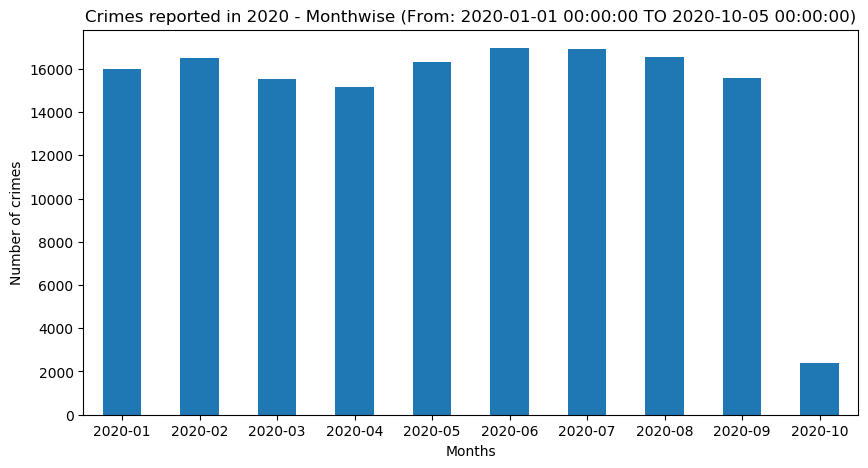

In [45]:
#reference: https://stackoverflow.com/questions/43682672/plot-pandas-dataframe-against-month
#reference: visualization_examples
plt.rcdefaults()
df_new['Date Rptd_as_date'].groupby(df_new['Date Rptd_as_date'].dt.to_period('M')).count().plot.bar(rot=0,figsize = (10, 5))
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.title('Crimes reported in 2020 - Monthwise (From: ' + str(df_new['Date Rptd_as_date'].min()) + 
          ' TO ' + str(df_new['Date Rptd_as_date'].max()) + ')')

The number of crimes in February 2020 is slightly higher when compared to January 2020.

Note: As the dataset is being updated regulary, the graph keeps changing for newly added data. So we could do analysis only when we have the complete data for a particular month.

Text(0, 0.5, 'Number of crimes')

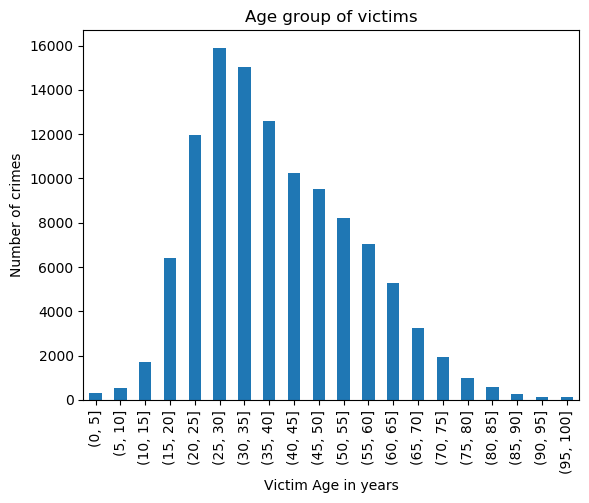

In [46]:
#reference: https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-rangeplt.rcdefaults()
#reference: visualization_examples
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df_new['Vict Age'].groupby(pd.cut(df_new['Vict Age'], bins=bins)).count().plot.bar()
plt.title('Age group of victims')
plt.xlabel('Victim Age in years')
plt.ylabel('Number of crimes')

Most of the victims are between the age group of 20 - 40 with highest victims in 25 - 30 age group.

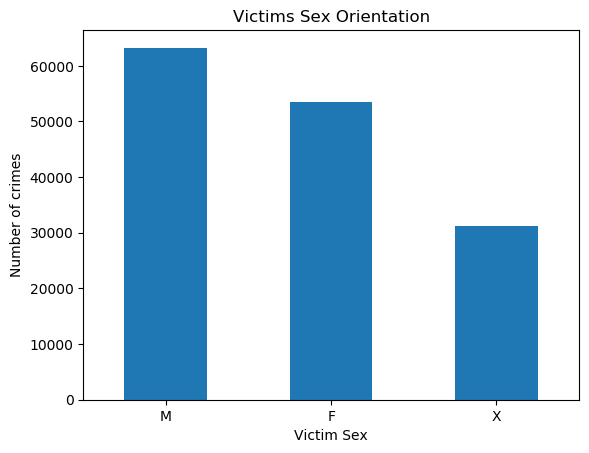

In [47]:
plt.rcdefaults()
plt.xlabel('Victim Sex')
plt.ylabel('Number of crimes')
plt.title('Victims Sex Orientation')
df_new['Vict Sex'].value_counts().plot.bar(rot=0)

Most of the victims are Males as per the data, but there are significant number of reports with unknown sex orientation of the victims. So we cannot make a clear observation in this case.

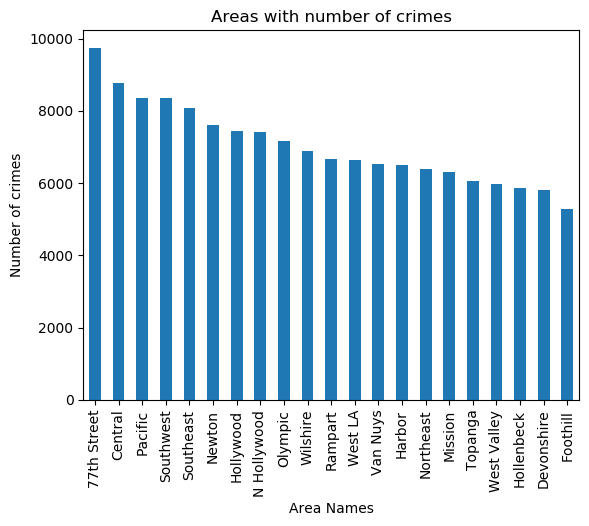

In [48]:
#reference: visualization_examples
plt.rcdefaults()
plt.xlabel('Area Names')
plt.ylabel('Number of crimes')
plt.title('Areas with number of crimes')
df_new['AREA NAME'].value_counts().plot.bar()

The highest number of crimes were reported in 77th Street and Central areas in the City of Los Angeles.

Text(0.5, 1.0, 'Time Occurred')

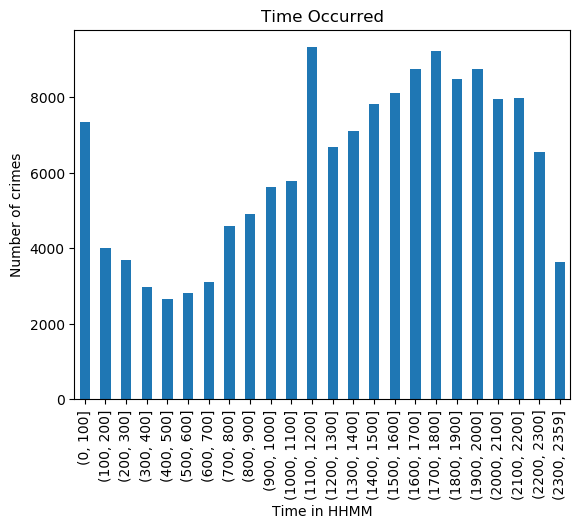

In [49]:
#reference: https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-range
#reference: visualization_examples
plt.rcdefaults()
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2359]
df_new['TIME OCC'].groupby(pd.cut(df_new['TIME OCC'], bins=bins)).count().plot.bar()
plt.xlabel('Time in HHMM')
plt.ylabel('Number of crimes')
plt.title('Time Occurred')

The lowest number of crimes occurred between 04:00 and 05:00. But there is an unusual drop in between 23:00 and 23:59 and a spike in between 00:00 and 01:00 and in between 11:00 and 12:00.

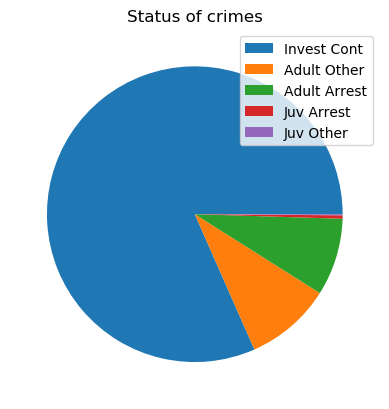

In [50]:
#reference: https://stackoverflow.com/questions/48791561/remove-labels-but-keep-legend-in-a-pie-chart
plt.rcdefaults()
x = df_new['Status Desc'].value_counts()
labels = x.index

plt.title('Status of crimes')
plt.pie(x)
plt.legend(labels=labels)
plt.show()

More than 80% of the reported crimes are under investigation.

Total run time

In [51]:
print((time.time() - start_time)/60,'minutes')
print(time.time() - start_time,'seconds')

0.44245774745941163 minutes
26.547715187072754 seconds


## Conclusion Story

The number of crimes in the City of Los Angeles have slightly increased in February when compared to January. 
Till date most of the victims in 25 - 30 age group and highest number of crimes were reported in 77th Street and Central areas.
More than 80% of the reported crimes are under investigation.

In this project, I have learned how clean the data and about to_datetime and groupby functions. I am yet do learn about effective ways to plot the graphs.